In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
from torch import optim
import numpy as np
import math
import random
import matplotlib.pyplot as plt



np.random.seed(0)
USE_CUDA = torch.cuda.is_available()
print("Cuda usability is : ", USE_CUDA)
device = torch.device("cuda" if USE_CUDA else "cpu")



def parity(amount, size):
    binsample = []
    bintarget = []

    for i in range(amount):
        binsample.append(torch.randint(0, 2, [1, size]).float())
        bintarget.append(torch.zeros([1, size]))
        bintarget[i][0][0] = binsample[i][0][0]

        for j in range(1, size):
            bintarget[i][0][j] = ((bintarget[i][0][j - 1] + binsample[i][0][j]) % 2).clone().detach().requires_grad_(True)


    return torch.cat(binsample, 0), torch.cat(bintarget, 0)


class RNNp(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(RNNp, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        self.act = nn.Tanh()
        self.hidden_neurons = []
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.output_size = output_size
        return

    def forward(self, x):
        pred, hidden = self.rnn(x, None)
        self.hidden_neurons = hidden
        pred = self.act(self.linear(pred)).view(pred.data.shape[0], -1, self.output_size)
        return pred

def train(inputs, targets, epoches,rate,NET):
        
        
        inputs=inputs.float()
        targets=targets.float()
        predictions = []
        loss_func = nn.MSELoss() 
        optimizer = optim.Adam(NET.parameters(),rate) #Adam
        optimizer.zero_grad()
        loss_monit=np.zeros([2,epoches])
        for t in range(epoches ):
            inp = Variable(torch.Tensor(inputs.reshape((inputs.shape[0], -1,1))), requires_grad=True)
            out = Variable(torch.Tensor(targets.reshape((targets.shape[0], -1,1))))
            pred = NET.forward(inp)
            optimizer.zero_grad()
            predictions.append(pred.data.numpy())
            loss = loss_func(pred, out)
            loss_monit[0,t] = t
            loss_monit[1,t] = loss
            loss.backward()
            optimizer.step()
            weights1 = NET.linear.weight.data
        
        return weights1,loss_monit[0,:],loss_monit[1,:]

  


Cuda usability is :  False


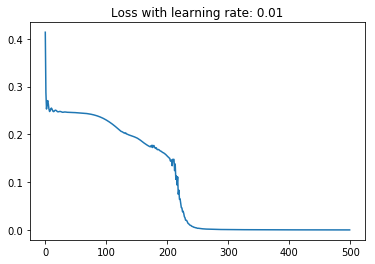

tensor([[1., 1., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 1., 0.],
        [0., 0., 0.,  ..., 1., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 1., 0., 1.],
        [0., 1., 0.,  ..., 1., 0., 0.]], grad_fn=<CatBackward>)


In [5]:
X, Y = parity(800, 10)

net= RNNp(1,30,1)

s,m,n=train(X,Y,500,0.01,net)

plt.plot(m,n)
plt.title('Loss with learning rate: '+str(0.01)) 
plt.show()


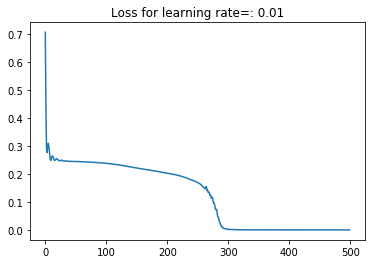

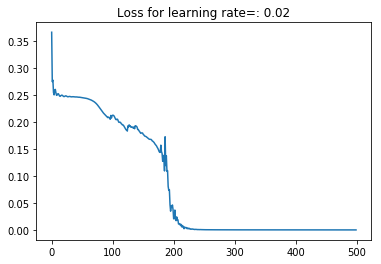

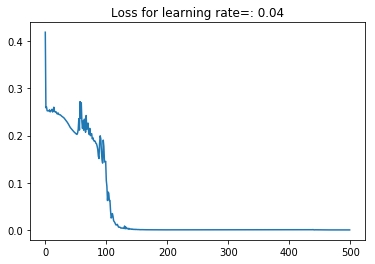

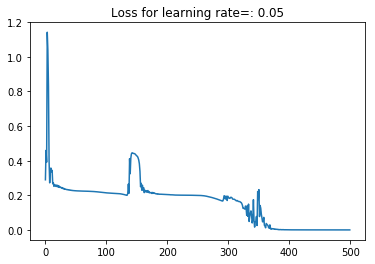

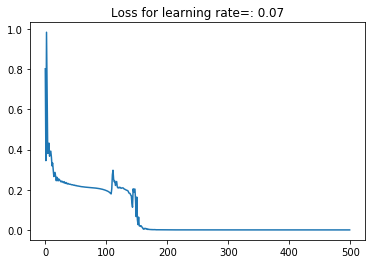

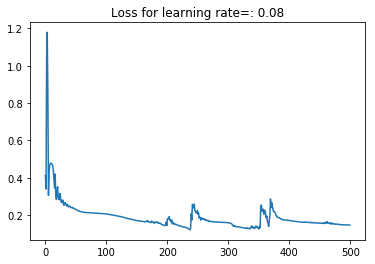

In [61]:
net1 = RNNp(1,30,1)
net2 = RNNp(1,30,1)
net3 = RNNp(1,30,1)
net4 = RNNp(1,30,1)
net5 = RNNp(1,30,1)
net6 = RNNp(1,30,1)

x2, y2 = parity(800, 10)

s,m1,n1=train(x2, y2, 500,0.01,net1)
s,m2,n2=train(x2, y2, 500,0.02,net2)
s,m3,n3=train(x2, y2, 500,0.04,net3)
s,m4,n4=train(x2, y2, 500,0.05,net4)
s,m5,n5=train(x2, y2, 500,0.07,net5)
s,m6,n6=train(x2, y2, 500,0.08,net6)



plt.plot(m1,n1)
plt.title('Loss for learning rate=: '+str(0.01)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for learning rate=: '+str(0.02))
plt.show()



plt.plot(m3,n3)
plt.title('Loss for learning rate=: '+str(0.04))
plt.show()



plt.plot(m4,n4)
plt.title('Loss for learning rate=: '+str(0.05)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for learning rate=: '+str(0.07)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for learning rate=: '+str(0.08)) 
plt.show()


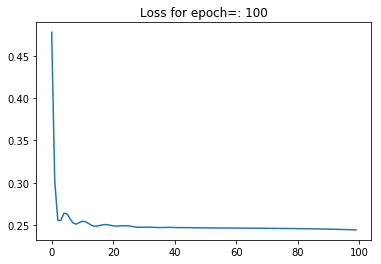

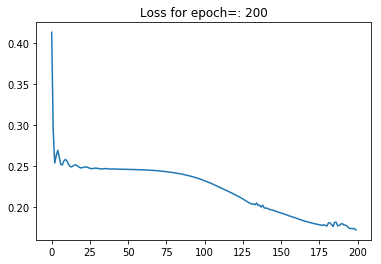

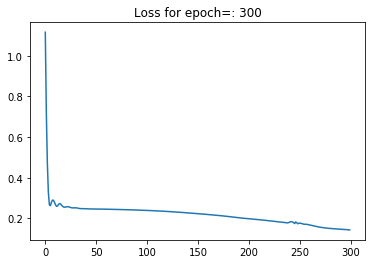

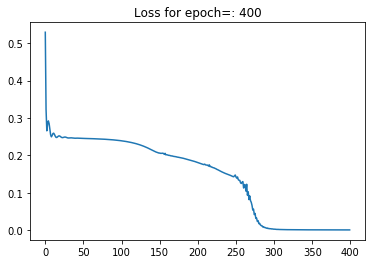

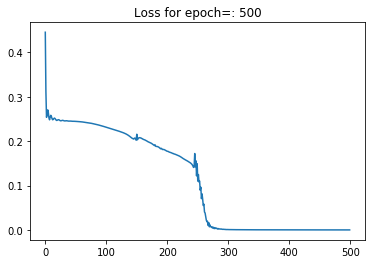

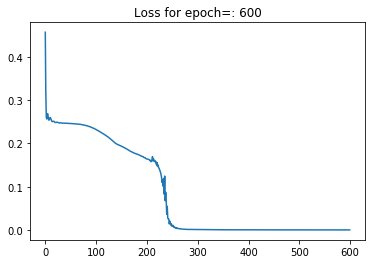

In [3]:
net1 = RNNp(1,30,1)
net2 = RNNp(1,30,1)
net3 = RNNp(1,30,1)
net4 = RNNp(1,30,1)
net5 = RNNp(1,30,1)
net6 = RNNp(1,30,1)

x2, y2 = parity(800, 10)

s,m1,n1=train(x2, y2, 100,0.01,net1)
s,m2,n2=train(x2, y2, 200,0.01,net2)
s,m3,n3=train(x2, y2, 300,0.01,net3)
s,m4,n4=train(x2, y2, 400,0.01,net4)
s,m5,n5=train(x2, y2, 500,0.01,net5)
s,m6,n6=train(x2, y2, 600,0.01,net6)



plt.plot(m1,n1)
plt.title('Loss for epoch=: '+str(100)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for epoch=: '+str(200)) 
plt.show()



plt.plot(m3,n3)
plt.title('Loss for epoch=: '+str(300)) 
plt.show()



plt.plot(m4,n4)
plt.title('Loss for epoch=: '+str(400)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for epoch=: '+str(500))  
plt.show()


plt.plot(m6,n6)
plt.title('Loss for epoch=: '+str(600))  
plt.show()


In [ ]:
net1 = RNNp(1,10,1)
net2 = RNNp(1,30,1)
net3 = RNNp(1,50,1)
net4 = RNNp(1,70,1)
net5 = RNNp(1,90,1)
net6 = RNNp(1,110,1)

x2, y2 = parity(800, 10)

s,m1,n1=train(x2, y2, 100,0.01,net1)
s,m2,n2=train(x2, y2, 100,0.01,net2)
s,m3,n3=train(x2, y2, 100,0.01,net3)
s,m4,n4=train(x2, y2, 100,0.01,net4)
s,m5,n5=train(x2, y2, 100,0.01,net5)
s,m6,n6=train(x2, y2, 100,0.01,net6)



plt.plot(m1,n1)
plt.title('Loss for layer_size=: '+str(10)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for layer_size=: '+str(30)) 
plt.show()



plt.plot(m3,n3)
plt.title('Loss for layer_size=: '+str(50))
plt.show()



plt.plot(m4,n4)
plt.title('Loss for layer_size=: '+str(70)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for layer_size=: '+str(90))
plt.show()


plt.plot(m6,n6)
plt.title('Loss for layer_size=: '+str(110))  
plt.show()


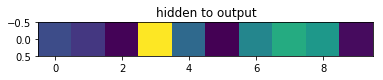

In [4]:
X, Y = parity(800, 10)

net= RNNp(1,10,1)

s,m,n=train(X,Y,500,0.02,net)

plt.imshow(s)
plt.title('hidden to output') 
plt.show()